In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [5]:
# Read data from csv file and print first 5 records
data = pd.read_csv("churn.csv")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [8]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

### Remove unwanted columns to build the Feature Set

In [35]:
remove_columns=["State","Area Code","Phone","Churn?"]
features = data.drop(remove_columns, axis=1)
features.head() 

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


### Convert "yes/no" values in the Feature Set to Boolean

In [36]:
features[["Int'l Plan","VMail Plan"]] = features[["Int'l Plan","VMail Plan"]] == "yes"

In [37]:
features.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [42]:
X = features.as_matrix().astype(np.float)
X

array([[ 128.  ,    0.  ,    1.  , ...,    3.  ,    2.7 ,    1.  ],
       [ 107.  ,    0.  ,    1.  , ...,    3.  ,    3.7 ,    1.  ],
       [ 137.  ,    0.  ,    0.  , ...,    5.  ,    3.29,    0.  ],
       ..., 
       [  28.  ,    0.  ,    0.  , ...,    6.  ,    3.81,    2.  ],
       [ 184.  ,    1.  ,    0.  , ...,   10.  ,    1.35,    2.  ],
       [  74.  ,    0.  ,    1.  , ...,    4.  ,    3.7 ,    0.  ]])

### Normalize features to range of -1 to 1

In [45]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.67648946, -0.32758048,  1.6170861 , ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.14906505, -0.32758048,  1.6170861 , ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.9025285 , -0.32758048, -0.61839626, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ..., 
       [-1.83505538, -0.32758048, -0.61839626, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [ 2.08295458,  3.05268496, -0.61839626, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [-0.67974475, -0.32758048,  1.6170861 , ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

In [46]:
X.shape

(3333, 17)

In [54]:
# Convert Churn indicator into digits
data_churn = data["Churn?"]
y = np.where(data_churn=='False.',0,1)
y.shape

(3333,)

### Cross Validation & Prediction Function

In [59]:
def predict(X,y,classifier,**kwargs):
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        model = classifier(**kwargs)
        model.fit(X_train,y_train)
        y_pred[test_index] = model.predict(X_test)
        
    return y_pred

### Model Initiation & Accuracy Calculation

In [73]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [74]:
def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred)  # NumPy interprets True and False as 1 and 0 respectively

print("Support Vector Machines:")
print("%.3f" % accuracy(y, predict(X, y, SVC)))
print("Random Forest:")
print("%.3f" % accuracy(y, predict(X, y, RF)))
print("K-Nearest Neighbors:")
print("%.3f" % accuracy(y, predict(X, y, KNN)))
print("Logistic Regression:")
print("%.3f" % accuracy(y, predict(X, y, LR)))
print("Gradient Boost:")
print("%.3f" % accuracy(y, predict(X, y, GBC)))

Support Vector Machines:
0.917
Random Forest:
0.945
K-Nearest Neighbors:
0.898
Logistic Regression:
0.862
Gradient Boost:
0.948


### Confusion Matrix

In [82]:
classes = np.unique(y)

confusion_matrices = [
    ( "Support Vector Machines", confusion_matrix(y,predict(X,y,SVC)) ),
    ( "Random Forest", confusion_matrix(y,predict(X,y,RF)) ),
    ( "K-Nearest Neighbors", confusion_matrix(y,predict(X,y,KNN)) ),
    ( "Logistic Regression", confusion_matrix(y,predict(X,y,LR)) ),
    ( "Gradient Boost", confusion_matrix(y,predict(X,y,GBC)) ) 
]

In [117]:
def display_confusion_matrices(confusion_matrices,classes):
    classes = classes.tolist()
    for cm in confusion_matrices:      
        print(cm[0])
        print(cm[1])
        print("Precision: %.2f" % (cm[1][1][1]/(cm[1][1][1]+cm[1][0][1])))
        print("Recall: %.2f" % (cm[1][1][1]/(cm[1][1][1]+cm[1][1][0])))
        fig = plt.figure()
        ax = fig.add_subplot(111) # 1*1 grid 1st subplot
        cax = ax.matshow(cm[1])   # Plot array as an image
        plt.title('Confusion matrix for %s' % cm[0])
        fig.colorbar(cax)
        ax.set_xticklabels([''] + classes)
        ax.set_yticklabels([''] + classes)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()    

Support Vector Machines
[[2818   32]
 [ 237  246]]
Precision: 0.88
Recall: 0.51


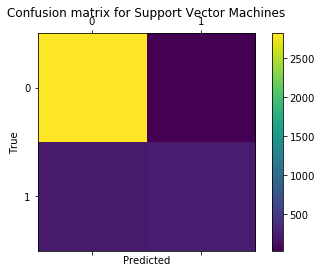

Random Forest
[[2821   29]
 [ 154  329]]
Precision: 0.92
Recall: 0.68


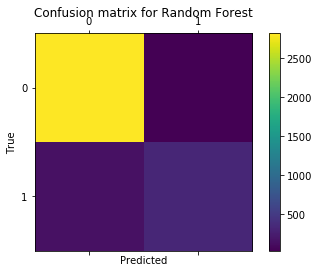

K-Nearest Neighbors
[[2807   43]
 [ 312  171]]
Precision: 0.80
Recall: 0.35


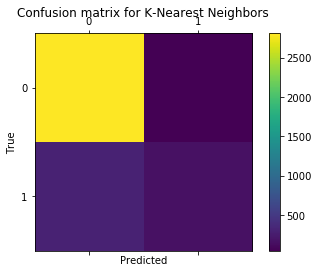

Logistic Regression
[[2765   85]
 [ 384   99]]
Precision: 0.54
Recall: 0.20


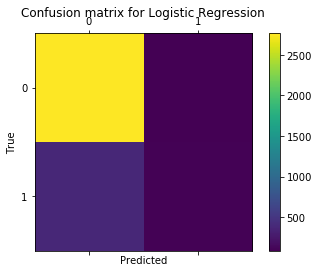

Gradient Boost
[[2816   34]
 [ 121  362]]
Precision: 0.91
Recall: 0.75


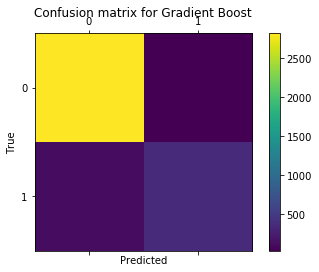

In [119]:
%matplotlib inline
display_confusion_matrices(confusion_matrices,classes)                                                                                                                        

### Precision & Recall 
#### Precision: When a classifier predicts an individual will churn, how often does that individual actually churn? 
#### Recall: When an individual churns, how often does my classifier predict that correctly?  

|        | Precision   | Recall |
|--------|-------------|--------|
|   Support Vector Machines  |    88%      |   51%  |
|   Random Forest  |    92%      |   68%  |
|   K-Nearest Neighbors  |    80%      |   35%  |
|   Logistic Regression  |    54%      |   20%  |
|   Gradient Boost  |    91%      |   75%  |

### "Random Forest" and "Gradient Boost" outperformed other classifiers.